# Импорт библиотек

In [2]:
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

# Загрузка данных

In [2]:
df = pd.read_csv('./KaggleV2-May-2016.csv')

# Разведочный анализ данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Анализ целевой переменной

*Каково соотношение людей, которые пропускают приемы, к тем, кто этого не делает?*

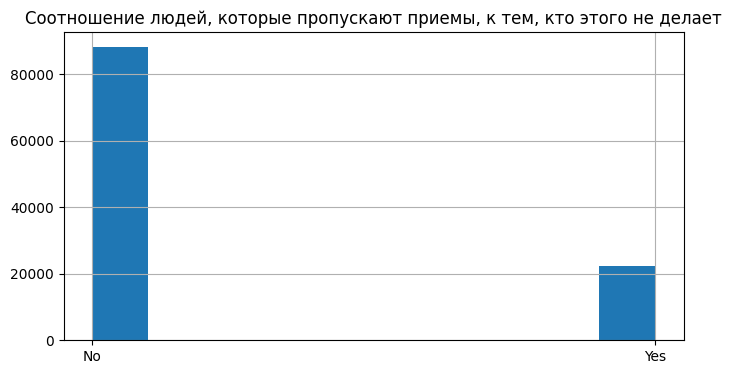

In [4]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [ ]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

*Кто не появляется чаще — мужчины или женщины?*

In [ ]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

# Предобработка данных

**Кодировка категориальных признаков**

In [ ]:
categorical_columns_names = ['Gender', 'Neighbourhood']

In [ ]:
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-05-03
110523   2016-05-03
110524   2016-04-27
110525   2016-04-27
110526   2016-04-27
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns]

**Обработка пропусков в данных**

In [ ]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Нам повезло — в нашем наборе данных нет нулевых значений.

Для логирования в Python используется модуль logging. Он используется большинством сторонних библиотек Python, поэтому вы можете интегрировать свои логи с сообщениями из этих библиотек для создания единого журнала логов приложения. Данный модуль импортируется как другие библиотеки:

In [1]:
import logging

Прежде чем приступить к логированию, необходимо установить базовые настройки:

уровень;
обработчик (хендлер);
формат логирования. 

С импортированным модулем logging вы можете использовать так называемый «logger» для логирования сообщений, которые вы хотите видеть (вместо вывода их на экран командой print()). 

По умолчанию существует пять стандартных уровней логирования, указывающих на важность событий: 

отладка;
информация;
предупреждение;
ошибка;
критический. 
Самый низкий уровень из данных — не установлен, а самый высокий уровень является критическим. Установив уровень логирования, можно записать сообщение специально для этого уровня в определённый файл журнала. Возле сообщения будет указан его уровень.

In [3]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


вариант сбросить настройки logging — воспользоваться функцией reload() из вспомогательной системной библиотеки importlib:

In [4]:
from importlib import reload
import logging
reload(logging)

<module 'logging' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/logging/__init__.py'>

Далее, когда настройки логирования сброшены, нам необходимо перед выводом сообщений, сразу после импорта, изменить конфигурацию логгера.

In [5]:
logging.basicConfig(level=logging.DEBUG)

Мы настроили уровень ведения журнала DEBUG. Это означает, что теперь будут отслеживаться только сообщения этого уровня (DEBUG) и выше. В результате выполнения кода логирования мы должны получить следующие сообщения:

In [6]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an informational message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


Как видно из результата выполнения кода, теперь в консоль выводятся лог-сообщения всех уровней.

Однако, как вы понимаете, логирование в консоль ничем не лучше простого вывода сообщений с помощью функции print(). Обычно логирование производится в специальные лог-файлы, для этого используются обработчики (хендлеры) логов. Давайте рассмотрим пример логирования в файл.

                                УСТАНОВКА ОБРАБОТЧИКА ЛОГИРОВАНИЯ

Функция обработчиков ведения журналов состоит в том, чтобы отображать записи/сообщения журнала на любом выходе, который вы выберете. То есть вы можете выбрать, отображать ли ваш лог в виде файла, HTTP-страницы или даже отправить лог на электронную почту через SMTP. 

Более того, у созданного вами logger может быть несколько обработчиков, а это значит, что вы можете настроить его на сохранение в файл журнала, а также на отправку по email одновременно. Подробнее ознакомиться с видами хендлеров можно здесь.

Обработчики являются классами модуля logging. Нам понадобится обработчик FileHandler, который возьмёт запись/сообщение журнала и добавит его в файл журнала log_file.log:

In [7]:
logging.FileHandler('log_file.log')

<FileHandler /Users/anatolijnalivajko/Documents/Skillfactory/EDA/EDA-6. Проектирование экспериментов/log_file.log (NOTSET)>

                                УСТАНОВКА ФОРМАТА ЛОГИРОВАНИЯ

Как мы уже сказали, типичный формат лога выглядит так: уровень: имя: сообщение. Однако его можно изменить.

Существуют различные способы форматирования записи журнала. Вы можете включить дату, время и уровень ведения журнала в свой формат, чтобы знать, когда журнал был отправлен и на каком уровне. В приведённом ниже примере показано, как можно настроить формат записей журнала. Так как мы вновь переопределяем настройки библиотеки logging, то не забудем сбросить конфигурацию.

In [8]:
from importlib import reload
import logging
reload(logging)
 
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2023-02-28 10:13:51,499: Check


Здесь формат записей журнала включает дату, время, уровень ведения журнала и само сообщение.

Таким образом, вы можете изменять как формат лога, так и формат вывода. Добавление времени сообщения существенно облегчает работу — становится легко отследить, когда было получено сообщение.